In [1]:
%matplotlib inline
import urllib.request 
import json, datetime, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 일별 박스오피스
def cineBoxInfo():
    #오늘 날짜를 가져와서 사용할 형식으로 만든다.
    movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
    
    cine=[]
    for i in range(0,30):
        #자료는 매일 갱신되며 갱신 시간이전에 요청시 내용이 비어 있음.
        #반복 함수 마지막에 날짜를 줄이는 함수를 사용한다.
        #str -> date
        datetime_obj = datetime.datetime.strptime(movieDate,"%Y%m%d").date()

        # 1일 혹은 1주일씩 시간을 줄여간다.
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)  #weeks=1
        
        #date -> str
        movieDate = datetime_obj_tmp.strftime("%Y%m%d")
        print(movieDate, end=" ")
                
        url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
        response =urllib.request.urlopen(url)
        #print(response)
        
        rescode = response.getcode()
        if(rescode == 200):
            responseData = response.read()

        result = json.loads(responseData)
        #print(result)
        pre_result = result["boxOfficeResult"]["dailyBoxOfficeList"]
        #print(pre_result)     
        
        for i in range(0,len(pre_result)):
            pre_result[i]['targetDt']=movieDate
            cine.append(pre_result[i])
      
    print()
    #list->dataframe
    dataframe=pd.DataFrame(cine)
    print(dataframe.columns)
    dataframe.to_csv("cinebox.csv", index = False)
    return dataframe

In [3]:
# 영화상세정보
def cineInfo(movieCd):
    url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=66e652e1d2656b42f10d93c91e0295e4&movieCd="+str(movieCd)
    response = urllib.request.urlopen(url)
    text = response.read()
    #print(text)
    d = json.loads(text)
    #print(d)
    movieInfo = d['movieInfoResult']['movieInfo']
    return movieInfo

In [4]:
cineBoxInfo()

20200404 20200403 20200402 20200401 20200331 20200330 20200329 20200328 20200327 20200326 20200325 20200324 20200323 20200322 20200321 20200320 20200319 20200318 20200317 20200316 20200315 20200314 20200313 20200312 20200311 20200310 20200309 20200308 20200307 20200306 
Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'targetDt'],
      dtype='object')


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,99.2,199644200,8288,4007,93.6,23533,199,618,20200404
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80,536048320,5010,2109,72.7,66420,352,718,20200404
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104,552161,280,497,20200404
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,1,OLD,20190864,울프 콜,2020-03-05,20678080,3.5,582300,2.9,50114860,2420,-157,-6.1,6209,327,601,20200306
296,7,7,1,OLD,20040598,해리포터와 아즈카반의 죄수,2004-07-16,24548500,4.1,5203000,26.9,11304048500,2412,175,7.8,1817385,45,180,20200306
297,8,8,-4,OLD,20204681,더 보이 2: 돌아온 브람스,2020-03-05,22696000,3.8,-12743000,-36,58135000,2409,-2215,-47.9,7033,163,437,20200306
298,9,9,0,OLD,20135428,어바웃 타임,2013-12-05,11196000,1.9,1152500,11.5,25103315800,2236,240,12,3411796,127,215,20200306


In [5]:
# 영화코드를 인자로 받아 영화상세정보 리턴
movieInfo = cineInfo(20204107)
movieInfo

{'movieCd': '20204107',
 'movieNm': '주디',
 'movieNmEn': 'Judy',
 'movieNmOg': '',
 'showTm': '117',
 'prdtYear': '2019',
 'openDt': '20200325',
 'prdtStatNm': '개봉',
 'typeNm': '장편',
 'nations': [{'nationNm': '영국'}],
 'genres': [{'genreNm': '드라마'}, {'genreNm': '멜로/로맨스'}],
 'directors': [{'peopleNm': '루퍼트 굴드', 'peopleNmEn': 'Rupert Goold'}],
 'actors': [{'peopleNm': '르네 젤위거',
   'peopleNmEn': 'Renee Zellweger',
   'cast': '',
   'castEn': ''}],
 'showTypes': [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'}],
 'companys': [{'companyCd': '20139196',
   'companyNm': 'TCO(주)더콘텐츠온',
   'companyNmEn': 'THE CONTENTS ON',
   'companyPartNm': '배급사'},
  {'companyCd': '20139095',
   'companyNm': '(주)퍼스트런',
   'companyNmEn': 'First Run Inc.',
   'companyPartNm': '수입사'},
  {'companyCd': '20139095',
   'companyNm': '(주)퍼스트런',
   'companyNmEn': 'First Run Inc.',
   'companyPartNm': '제공'}],
 'audits': [{'auditNo': '2020-MF00024', 'watchGradeNm': '12세이상관람가'}],
 'staffs': []}

In [6]:
print(movieInfo['movieCd'],
      movieInfo['movieNm'],
      movieInfo['showTm'],
      len(movieInfo['actors']),
      len(movieInfo['showTypes']))

20204107 주디 117 1 1


In [7]:
# 필요한 영화 코드
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,99.2,199644200,8288,4007,93.6,23533,199,618,20200404
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,1,OLD,20190864,울프 콜,2020-03-05,20678080,3.5,582300,2.9,50114860,2420,-157,-6.1,6209,327,601,20200306
296,7,7,1,OLD,20040598,해리포터와 아즈카반의 죄수,2004-07-16,24548500,4.1,5203000,26.9,11304048500,2412,175,7.8,1817385,45,180,20200306
297,8,8,-4,OLD,20204681,더 보이 2: 돌아온 브람스,2020-03-05,22696000,3.8,-12743000,-36.0,58135000,2409,-2215,-47.9,7033,163,437,20200306
298,9,9,0,OLD,20135428,어바웃 타임,2013-12-05,11196000,1.9,1152500,11.5,25103315800,2236,240,12.0,3411796,127,215,20200306


In [5]:
codeitem = pd.unique(df['movieCd'])
codeitem
.tolist()
print(codeitem)   

cine=[]
for code in codeitem:
    movieInfo = cineInfo(code)
    item={'movieCd':movieInfo['movieCd'],'movieNm':movieInfo['movieNm'],'showTm':movieInfo['showTm'],'actors':len(movieInfo['actors']),'showTypes':len(movieInfo['showTypes'])}
    cine.append(item)
    
dataframe=pd.DataFrame(cine)
dataframe.to_csv("cine.csv",index = False)         

[20205262, 20204107, 20192399, 20205841, 20199842, 20206446, 20205708, 20167904, 20180962, 20204791, 20204340, 20205321, 20190280, 20161872, 20206424, 20193321, 20090528, 20206141, 20199981, 20192240, 20180523, 19980231, 20205096, 20135428, 20167542, 20010238, 20192751, 19940116, 20184574, 20204681, 20196828, 20040598, 20205529, 20190864, 20193526]


   rnum  rank  rankInten rankOldAndNew   movieCd     movieNm      openDt  \
0     1     1          0           OLD  20205262  엽문4: 더 파이널  2020-04-01   
1     2     2          1           OLD  20192399        1917  2020-02-19   
2     3     3         -1           OLD  20204107          주디  2020-03-25   
3     4     4          1           OLD  20199842       인비저블맨  2020-02-26   
4     5     5          1           OLD  20206446    n번째 이별 중  2020-04-01   

   salesAmt  salesShare  salesInten  salesChange    salesAcc  audiCnt  \
0  75121500        20.0    37409400         99.2   199644200     8288   
1  51816600        13.8    27695280        114.8  6645285440     5683   
2  44614800        11.9    19833300         80.0   536048320     5010   
3  32247140         8.6    16899580        110.1  4811744180     3453   
4  27768800         7.4    15020600        117.8    69091500     2906   

   audiInten  audiChange  audiAcc  scrnCnt  showCnt  targetDt  
0       4007        93.6    23533      1

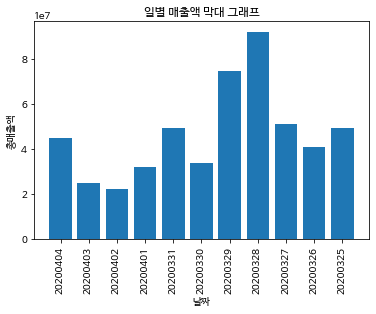

In [11]:
def graph_m(title):
    df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
    print(df.head())
    print('-'*60)
    #df=df.drop('Unnamed: 0',axis=1)  # 불러온 컬럼중 제거할 컬럼이 있다면 제거한다.
    df=df.drop('rnum',axis=1)
    print(df.head())
    print(title)
    print(df.columns)
    temp = df[df['movieNm'] == title]
    print(temp[['salesAmt','targetDt','movieNm']])
    print(temp.dtypes)
    mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
    plt.bar(temp['targetDt'].astype(str),temp['salesAmt']) 
    plt.title('일별 매출액 막대 그래프')
    plt.xlabel('날짜')
    plt.ylabel('총매출액')
    plt.xticks(fontsize=10, rotation=90)
    url1="" + title + ".png"
    plt.savefig(url1)

if __name__ == "__main__":
    graph_m("주디")

In [14]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,37712100,17.6,-247800,-0.7,124522700,4281,-518,-10.8,15245,175,504,20200403
1,2,2,0,OLD,20204107,주디,2020-03-25,24781500,11.6,2738760,12.4,491433520,2901,110,3.9,61410,319,590,20200403
2,3,3,1,OLD,20192399,1917,2020-02-19,24121320,11.2,3258020,15.6,6593468840,2784,193,7.4,724049,313,503,20200403
3,4,4,-1,OLD,20205841,더 터닝,2020-04-02,17390260,8.1,-5097820,-22.7,41122840,1956,-758,-27.9,4810,256,476,20200403
4,5,5,0,OLD,20199842,인비저블맨,2020-02-26,15347560,7.2,1862900,13.8,4779497040,1693,60,3.7,548708,252,399,20200403


In [13]:
df['movieNm'] == '인비저블맨'

0      False
1      False
2      False
3       True
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: movieNm, Length: 300, dtype: bool

In [14]:
temp1 = df[df['movieNm'] == '인비저블맨']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
14,5,5,0,OLD,20199842,인비저블맨,2020-02-26,15347560,7.2,1862900,13.8,4779497040,1693,60,3.7,548708,252,399,20200403
24,5,5,-1,OLD,20199842,인비저블맨,2020-02-26,13484660,6.3,-5910100,-30.5,4764149480,1633,-740,-31.2,547015,245,379,20200402
33,4,4,-1,OLD,20199842,인비저블맨,2020-02-26,19394760,7.7,-11793160,-37.8,4750664820,2373,-1558,-39.6,545382,296,489,20200401
42,3,3,0,OLD,20199842,인비저블맨,2020-02-26,31187920,11.7,5964980,23.6,4731270060,3931,848,27.5,543009,353,633,20200331


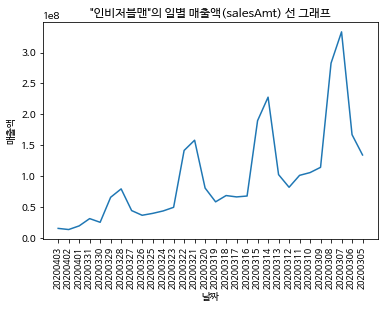

In [16]:

mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
plt.title('"{}"의 일별 매출액(salesAmt) 선 그래프'.format(temp1.iloc[0,5]))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

In [17]:
temp1.iloc[0,5]

'인비저블맨'

In [17]:
temp = df.groupby('movieNm').sum()
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
1917,79,79,0,605771970,2266211020,493.1,-39187820,327.3,175592171040,251629,-4578,297.5,19158122,13813,30972,606009891
n번째 이별 중,23,23,0,80825784,68387500,25.0,27768800,199.4,156938800,7719,2906,177.5,18360,640,1370,80801610
걸즈 앤 판처 최종장,10,10,0,20196828,8802000,2.3,8802000,100.0,8802000,1030,1030,100.0,1030,11,58,20200312
그린 북,10,10,60,20184574,2663500,1.0,2603500,4339.2,3689881360,530,518,4316.7,441993,100,159,20200316
그링고,29,29,15,60616587,19781500,4.8,4789000,336.1,94843500,3823,1061,621.3,17115,83,114,60600930
날씨의 아이,49,49,18,141331960,112300420,33.9,11581000,630.8,38652653930,11296,1152,590.7,4671315,131,247,141402372
너의 이름은.,35,35,18,80647488,45892000,15.9,6391000,378.0,119809233524,4595,641,377.5,14883291,62,112,80801384
눈의 여왕4,8,8,0,20199981,18920000,4.7,18920000,100.0,1489224580,1892,1892,100.0,211012,10,10,20200325
다크 워터스,106,106,-4,484914984,1070554520,248.7,9554520,224.3,18664485220,124127,1156,206.1,2153367,9215,20712,484807949


In [15]:
# temp = df.groupby('movieNm').count()
# temp

,rnum,rank,rankInten,rankOldAndNew,movieCd,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,,,
1917,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
n번째 이별 중,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
걸즈 앤 판처 최종장,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
그린 북,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
그링고,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
날씨의 아이,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
너의 이름은.,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
눈의 여왕4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
다크 워터스,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


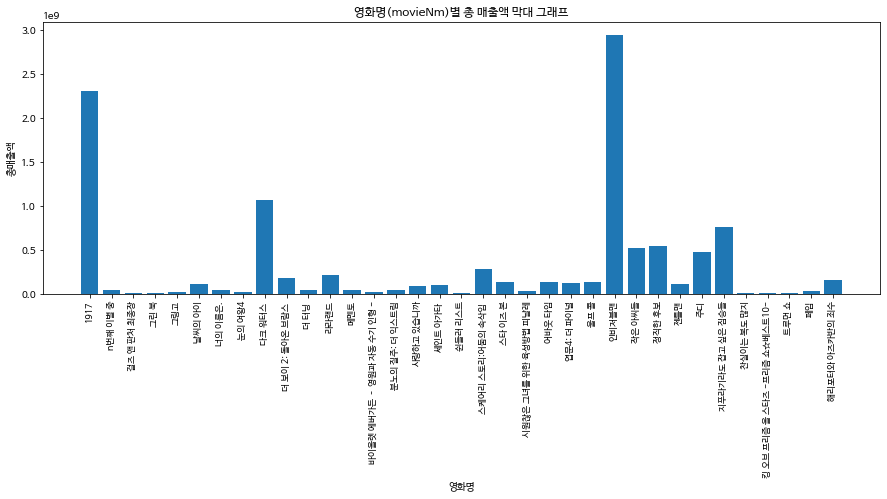

In [19]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(15, 5))
plt.bar(temp.index, temp['salesAmt']) 
plt.title('영화명(movieNm)별 총 매출액 막대 그래프')
plt.xlabel('영화명')
plt.ylabel('총매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

- 분포도 그리기

In [20]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp.head()

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
1917,79,79,-1,605771970,2305398840,496.9,-86492040,194.8,173325960020,256207,-9373,177.8,18906493,13962,31738,606009792
n번째 이별 중,18,18,-1,60619338,40618700,17.6,12748200,81.6,87847300,4813,1389,68.3,10577,469,974,60601206
걸즈 앤 판처 최종장,10,10,0,20196828,8802000,2.3,8802000,100.0,8802000,1030,1030,100.0,1030,11,58,20200312
그린 북,10,10,60,20184574,2663500,1.0,2603500,4339.2,3689881360,530,518,4316.7,441993,100,159,20200316
그링고,29,29,15,60616587,19781500,4.8,4789000,336.1,94843500,3823,1061,621.3,17115,83,114,60600930


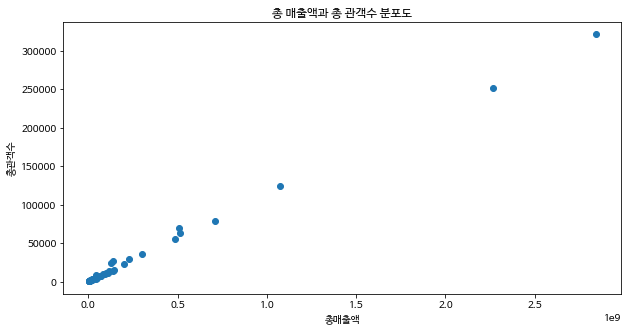

In [19]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 5))
# plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.title('총 매출액과 총 관객수 분포도')
plt.xlabel('총매출액')
plt.ylabel('총관객수')
plt.show()

- 파이차트 그리기

In [21]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp = temp.sort_values(by='salesAmt', ascending=0)
temp = temp.iloc[:10]
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
인비저블맨,56,56,-3,605995260,2843295380,594.4,-101971060,202.2,117776079020,321379,-12583,165.2,13516812,14734,36922,606009891
1917,79,79,0,605771970,2266211020,493.1,-39187820,327.3,175592171040,251629,-4578,297.5,19158122,13813,30972,606009891
다크 워터스,106,106,-4,484914984,1070554520,248.7,9554520,224.3,18664485220,124127,1156,206.1,2153367,9215,20712,484807949
지푸라기라도 잡고 싶은 짐승들,114,114,17,443981164,707058300,134.6,-31731780,497.1,113538987520,79271,-3688,445.0,13087999,6963,14245,444407048
주디,18,18,0,222245177,514587020,154.1,44614800,187.4,3645597360,63730,5010,142.5,461504,4468,10766,222203906
정직한 후보,137,137,0,484639704,508366920,105.2,-24466780,78.5,303059011980,69872,-2525,127.5,36089441,6793,11508,484807628
작은 아씨들,104,104,-1,383652560,484890300,95.5,-25148200,27.7,133077778650,55778,-3031,11.2,15787925,5304,8605,383805985
스케어리 스토리:어둠의 속삭임,54,54,-5,222262788,301238640,86.4,18317220,84.7,2259252000,36142,1947,42.0,280333,1998,4558,222203906
라라랜드,66,66,-7,221846944,229454420,65.6,14496240,50.7,332310683008,29487,1618,24.7,39859506,1121,2905,222203906


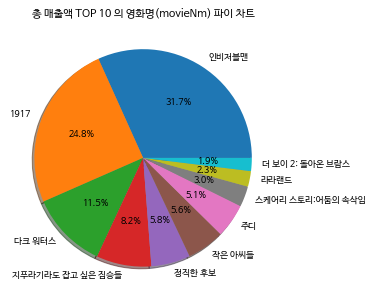

In [23]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
plt.figure(figsize=(10, 5))
plt.pie(temp['salesAmt'], labels=temp.index, autopct='%.1f%%', shadow=True)
plt.title('총 매출액 TOP 10 의 영화명(movieNm) 파이 차트')
plt.show()

In [23]:
df1 = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df1

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,99.2,199644200,8288,4007,93.6,23533,199,618,20200404
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,1,OLD,20190864,울프 콜,2020-03-05,20678080,3.5,582300,2.9,50114860,2420,-157,-6.1,6209,327,601,20200306
296,7,7,1,OLD,20040598,해리포터와 아즈카반의 죄수,2004-07-16,24548500,4.1,5203000,26.9,11304048500,2412,175,7.8,1817385,45,180,20200306
297,8,8,-4,OLD,20204681,더 보이 2: 돌아온 브람스,2020-03-05,22696000,3.8,-12743000,-36.0,58135000,2409,-2215,-47.9,7033,163,437,20200306
298,9,9,0,OLD,20135428,어바웃 타임,2013-12-05,11196000,1.9,1152500,11.5,25103315800,2236,240,12.0,3411796,127,215,20200306


In [24]:
df2 = pd.read_csv(r'cine.csv',engine='python',encoding='utf-8')
df2

,movieCd,movieNm,showTm,actors,showTypes
0,20205262,엽문4: 더 파이널,104,4,1
1,20192399,1917,119,8,3
2,20204107,주디,117,1,1
3,20199842,인비저블맨,124,2,2
4,20206446,n번째 이별 중,104,2,1
5,20205841,더 터닝,94,2,1
6,20205708,스케어리 스토리:어둠의 속삭임,108,1,1
7,20167904,라라랜드,127,5,2
8,20204791,다크 워터스,127,7,1
9,20010013,봄날은 간다,113,16,2


In [22]:
df3 = pd.merge(df1, df2, on='movieCd') 
df3

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm_x,openDt,salesAmt,salesShare,salesInten,...,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,movieNm_y,showTm,actors,showTypes
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,...,4007,93.6,23533,199,618,20200404,엽문4: 더 파이널,104,4,1
1,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,37712100,17.6,-247800,...,-518,-10.8,15245,175,504,20200403,엽문4: 더 파이널,104,4,1
2,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,37959900,17.6,-10890800,...,-1366,-22.2,10964,170,503,20200402,엽문4: 더 파이널,104,4,1
3,1,1,0,NEW,20205262,엽문4: 더 파이널,2020-04-01,48850700,19.3,48850700,...,6165,100.0,6165,175,509,20200401,엽문4: 더 파이널,104,4,1
4,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,...,2899,104.1,729732,362,638,20200404,1917,119,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,1,OLD,20190864,울프 콜,2020-03-05,20678080,3.5,582300,...,-157,-6.1,6209,327,601,20200306,울프 콜,115,4,1
296,10,10,2,OLD,20193526,젠틀맨,2020-02-26,10549780,2.6,305640,...,9,0.7,73810,230,331,20200310,젠틀맨,113,7,1
297,9,9,-1,OLD,20193526,젠틀맨,2020-02-26,27728560,2.9,-7480800,...,-826,-21.4,71305,295,464,20200308,젠틀맨,113,7,1
298,8,8,2,OLD,20193526,젠틀맨,2020-02-26,35209360,3.2,16848740,...,1831,90.6,68278,304,493,20200307,젠틀맨,113,7,1


In [35]:
df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1], inplace=True)
df3=df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1])
df3

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm_x,openDt,salesAmt,salesShare,salesInten,...,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,movieNm_y,showTm,actors,showTypes
0,1,1,0,0,20205262,엽문4: 더 파이널,2020-04-01,37712100,17.6,-247800,...,-518,-10.8,15245,175,504,20200403,엽문4: 더 파이널,104,4,1
1,1,1,0,0,20205262,엽문4: 더 파이널,2020-04-01,37959900,17.6,-10890800,...,-1366,-22.2,10964,170,503,20200402,엽문4: 더 파이널,104,4,1
2,1,1,0,1,20205262,엽문4: 더 파이널,2020-04-01,48850700,19.3,48850700,...,6165,100.0,6165,175,509,20200401,엽문4: 더 파이널,104,4,1
3,2,2,0,0,20204107,주디,2020-03-25,24781500,11.6,2738760,...,110,3.9,61410,319,590,20200403,주디,117,1,1
4,2,2,0,0,20204107,주디,2020-03-25,22042740,10.2,-9755820,...,-1314,-32.0,58509,323,598,20200402,주디,117,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,10,2,0,20193526,젠틀맨,2020-02-26,10549780,2.6,305640,...,9,0.7,73810,230,331,20200310,젠틀맨,113,7,1
296,9,9,-1,0,20193526,젠틀맨,2020-02-26,27728560,2.9,-7480800,...,-826,-21.4,71305,295,464,20200308,젠틀맨,113,7,1
297,8,8,2,0,20193526,젠틀맨,2020-02-26,35209360,3.2,16848740,...,1831,90.6,68278,304,493,20200307,젠틀맨,113,7,1
298,10,10,0,0,20193526,젠틀맨,2020-02-26,18360620,3.1,2718700,...,136,7.2,64425,289,438,20200306,젠틀맨,113,7,1


In [26]:
df3=df3.loc[:,['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes']]
df3

,targetDt,rank,rankOldAndNew,movieCd,salesAmt,audiCnt,showTm,actors,showTypes
0,20200404,1,OLD,20205262,75121500,8288,104,4,1
1,20200403,1,OLD,20205262,37712100,4281,104,4,1
2,20200402,1,OLD,20205262,37959900,4799,104,4,1
3,20200401,1,NEW,20205262,48850700,6165,104,4,1
4,20200404,2,OLD,20192399,51816600,5683,119,8,3
...,...,...,...,...,...,...,...,...,...
295,20200306,6,OLD,20190864,20678080,2420,115,4,1
296,20200310,10,OLD,20193526,10549780,1257,113,7,1
297,20200308,9,OLD,20193526,27728560,3027,113,7,1
298,20200307,8,OLD,20193526,35209360,3853,113,7,1


In [30]:
#상관계수 두 변수간의 연관된 정도를 나타낸다. 두변수가 동일하면 +1, 전혀 다르면 0, 반대방향으로 동일하면 -1
temp = df3.corr()
temp

,targetDt,rank,movieCd,salesAmt,audiCnt,showTm,actors,showTypes
targetDt,1.000000,0.000000,0.144660,-0.186761,-0.200568,-0.150647,-0.198436,0.001235
rank,0.000000,1.000000,-0.390614,-0.623849,-0.644168,-0.063263,0.023878,-0.106857
movieCd,0.144660,-0.390614,1.000000,0.218360,0.216799,-0.304001,0.083641,-0.267404
salesAmt,-0.186761,-0.623849,0.218360,1.000000,0.994944,0.086037,-0.052055,0.245295
audiCnt,-0.200568,-0.644168,0.216799,0.994944,1.000000,0.097865,-0.059667,0.236310
showTm,-0.150647,-0.063263,-0.304001,0.086037,0.097865,1.000000,-0.156361,0.195256
actors,-0.198436,0.023878,0.083641,-0.052055,-0.059667,-0.156361,1.000000,-0.015329
showTypes,0.001235,-0.106857,-0.267404,0.245295,0.236310,0.195256,-0.015329,1.000000


In [31]:
temp = temp.rename(index={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp = temp.rename(columns={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수','showTypes': '상영형태 수'})
temp

,날짜,순위,영화코드,매출액,관객수,상영시간,배우 수,상영형태 수
날짜,1.000000,0.000000,0.144660,-0.186761,-0.200568,-0.150647,-0.198436,0.001235
순위,0.000000,1.000000,-0.390614,-0.623849,-0.644168,-0.063263,0.023878,-0.106857
영화코드,0.144660,-0.390614,1.000000,0.218360,0.216799,-0.304001,0.083641,-0.267404
매출액,-0.186761,-0.623849,0.218360,1.000000,0.994944,0.086037,-0.052055,0.245295
관객수,-0.200568,-0.644168,0.216799,0.994944,1.000000,0.097865,-0.059667,0.236310
상영시간,-0.150647,-0.063263,-0.304001,0.086037,0.097865,1.000000,-0.156361,0.195256
배우 수,-0.198436,0.023878,0.083641,-0.052055,-0.059667,-0.156361,1.000000,-0.015329
상영형태 수,0.001235,-0.106857,-0.267404,0.245295,0.236310,0.195256,-0.015329,1.000000


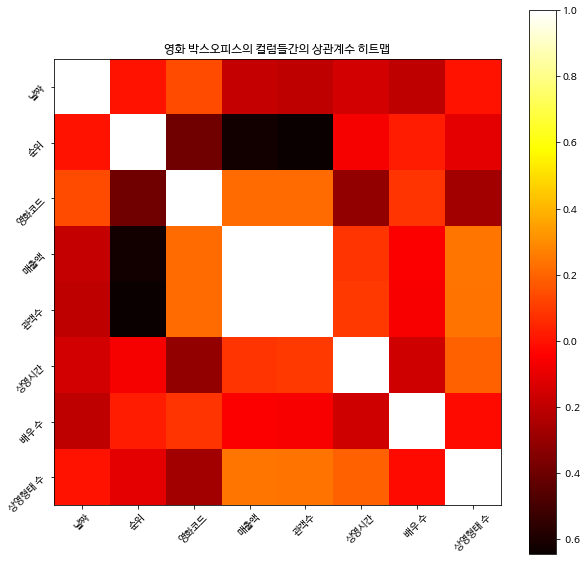

In [33]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 10))
plt.imshow(temp, cmap='hot')
plt.colorbar()
plt.title('영화 박스오피스의 컬럼들간의 상관계수 히트맵')
#plt.xticks(range(9), ['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes'])
plt.xticks(range(len(temp.columns)), temp.columns)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(range(len(temp.index)), temp.index)
plt.yticks(fontsize=10, rotation=45)
plt.show()

In [35]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,99.2,199644200,8288,4007,93.6,23533,199,618,20200404
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404


In [36]:
temp1 = df[df['movieNm'] == '인비저블맨']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
14,5,5,0,OLD,20199842,인비저블맨,2020-02-26,15347560,7.2,1862900,13.8,4779497040,1693,60,3.7,548708,252,399,20200403
24,5,5,-1,OLD,20199842,인비저블맨,2020-02-26,13484660,6.3,-5910100,-30.5,4764149480,1633,-740,-31.2,547015,245,379,20200402
33,4,4,-1,OLD,20199842,인비저블맨,2020-02-26,19394760,7.7,-11793160,-37.8,4750664820,2373,-1558,-39.6,545382,296,489,20200401
42,3,3,0,OLD,20199842,인비저블맨,2020-02-26,31187920,11.7,5964980,23.6,4731270060,3931,848,27.5,543009,353,633,20200331


In [37]:
temp2 = df[df['movieNm'] == '1917']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
12,3,3,1,OLD,20192399,1917,2020-02-19,24121320,11.2,3258020,15.6,6593468840,2784,193,7.4,724049,313,503,20200403
23,4,4,-1,OLD,20192399,1917,2020-02-19,20863300,9.7,-9283460,-30.8,6569347520,2591,-1154,-30.8,721265,307,481,20200402
32,3,3,-1,OLD,20192399,1917,2020-02-19,30146760,11.9,-11392000,-27.4,6548484220,3745,-1593,-29.8,718674,341,589,20200401
41,2,2,0,OLD,20192399,1917,2020-02-19,41538760,15.6,14376040,52.9,6518337460,5338,1923,56.3,714929,379,657,20200331


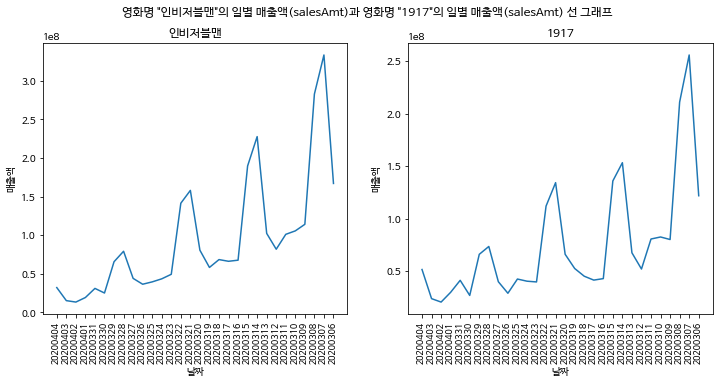

In [38]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
fig = plt.figure()
fig.set_size_inches(12,5)

#분할해 그리기 시작
axe = fig.add_subplot(1,2,1) #1행(row) 2열(column)중 첫 번째 subplot
axe.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
axe.set_title('인비저블맨')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
    
axe = fig.add_subplot(1,2,2) #1행(row) 2열(column)중 두번째 subplot
axe.plot([str(x) for x in temp2['targetDt']], temp2['salesAmt'])
axe.set_title('1917')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
plt.suptitle('영화명 "인비저블맨"의 일별 매출액(salesAmt)과 영화명 "1917"의 일별 매출액(salesAmt) 선 그래프')
#분할해 그리기 끝
plt.show()

In [39]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20205262,엽문4: 더 파이널,2020-04-01,75121500,20.0,37409400,99.2,199644200,8288,4007,93.6,23533,199,618,20200404
1,2,2,1,OLD,20192399,1917,2020-02-19,51816600,13.8,27695280,114.8,6645285440,5683,2899,104.1,729732,362,638,20200404
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404
3,4,4,1,OLD,20199842,인비저블맨,2020-02-26,32247140,8.6,16899580,110.1,4811744180,3453,1760,104.0,552161,280,497,20200404
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404


In [46]:
temp1 = df[df['movieNm'] == 'n번째 이별 중']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404
15,6,6,1,OLD,20206446,n번째 이별 중,2020-04-01,12748200,5.9,2123800,20.0,41322700,1389,113,8.9,4877,155,332,20200403
26,7,7,-2,OLD,20206446,n번째 이별 중,2020-04-01,10624400,4.9,-6621700,-38.4,28574500,1276,-872,-40.6,3488,157,307,20200402
34,5,5,0,NEW,20206446,n번째 이별 중,2020-04-01,17246100,6.8,17246100,100.0,17950100,2148,2148,100.0,2212,157,335,20200401


In [47]:
temp2 = df[df['movieNm'] == '주디']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404
11,2,2,0,OLD,20204107,주디,2020-03-25,24781500,11.6,2738760,12.4,491433520,2901,110,3.9,61410,319,590,20200403
21,2,2,0,OLD,20204107,주디,2020-03-25,22042740,10.2,-9755820,-30.7,466652020,2791,-1314,-32.0,58509,323,598,20200402
31,2,2,-1,OLD,20204107,주디,2020-03-25,31798560,12.6,-17658360,-35.7,444609280,4105,-2300,-35.9,55718,346,730,20200401
40,1,1,0,OLD,20204107,주디,2020-03-25,49456920,18.5,15962440,47.7,412810720,6405,2126,49.7,51613,407,968,20200331


In [48]:
dates = list(set(temp1['targetDt']) | set(temp2['targetDt']))
dates.sort()
len(dates)

11

In [49]:
def apply_temp1(date):
    return dates.index(date)
temp1['x'] = temp1['targetDt'].apply(apply_temp1)
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
4,5,5,1,OLD,20206446,n번째 이별 중,2020-04-01,27768800,7.4,15020600,117.8,69091500,2906,1517,109.2,7783,171,396,20200404,10
15,6,6,1,OLD,20206446,n번째 이별 중,2020-04-01,12748200,5.9,2123800,20.0,41322700,1389,113,8.9,4877,155,332,20200403,9
26,7,7,-2,OLD,20206446,n번째 이별 중,2020-04-01,10624400,4.9,-6621700,-38.4,28574500,1276,-872,-40.6,3488,157,307,20200402,8
34,5,5,0,NEW,20206446,n번째 이별 중,2020-04-01,17246100,6.8,17246100,100.0,17950100,2148,2148,100.0,2212,157,335,20200401,7


In [50]:
def apply_temp2(date):
    return dates.index(date)
temp2['x'] = temp2['targetDt'].apply(apply_temp2)
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
2,3,3,-1,OLD,20204107,주디,2020-03-25,44614800,11.9,19833300,80.0,536048320,5010,2109,72.7,66420,352,718,20200404,10
11,2,2,0,OLD,20204107,주디,2020-03-25,24781500,11.6,2738760,12.4,491433520,2901,110,3.9,61410,319,590,20200403,9
21,2,2,0,OLD,20204107,주디,2020-03-25,22042740,10.2,-9755820,-30.7,466652020,2791,-1314,-32.0,58509,323,598,20200402,8
31,2,2,-1,OLD,20204107,주디,2020-03-25,31798560,12.6,-17658360,-35.7,444609280,4105,-2300,-35.9,55718,346,730,20200401,7
40,1,1,0,OLD,20204107,주디,2020-03-25,49456920,18.5,15962440,47.7,412810720,6405,2126,49.7,51613,407,968,20200331,6


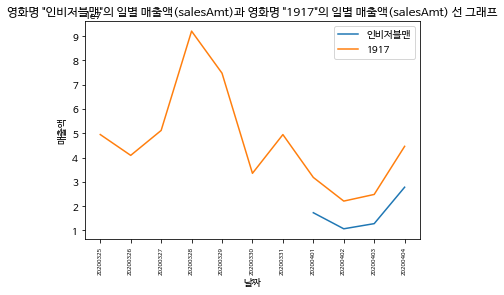

In [51]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot(temp1['x'], temp1['salesAmt'],label='인비저블맨')
plt.plot(temp2['x'], temp2['salesAmt'],label='1917')
plt.title('영화명 "인비저블맨"의 일별 매출액(salesAmt)과 영화명 "1917"의 일별 매출액(salesAmt) 선 그래프')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(range(len(dates)),dates, fontsize=6, rotation=90)
plt.legend(loc=1) #범례
plt.show()